<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Working_With_Four_Dimensional_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Iport nibabel to load image data
import nibabel as nib
!pip install nipraxis 
import nipraxis 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
structure_fname = nipraxis.fetch_file('ds114_sub009_t2r1.nii')

In [4]:
image = nib.load(structure_fname)
type(image)

nibabel.nifti1.Nifti1Image

In [5]:
#Load the image data 
data = image.get_fdata()

data.shape #4D image which contains rows,columns,planes and time 

(64, 64, 30, 173)

In [6]:
#Slice over the final axis 
slice_final_axis = data[:,:,:,0]
slice_final_axis.shape #This slice selcts the first 3D volume from our image 


(64, 64, 30)

In [7]:
#We can use elipsis when slicing an array 
slice_ellipsis = data[...,0] #It can be used to mean everything over the previous axes 

In [8]:
slice_ellipsis.shape

(64, 64, 30)

In [9]:
slice_volume = data[:,:,14]

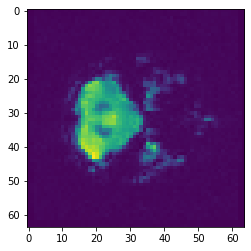

In [10]:
import matplotlib.pyplot as plt
#Plot the 3d image 
first_vol = data[:,:,:,100]
first_slice = first_vol[...,0]
plt.imshow(first_slice)

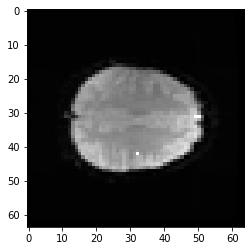

In [11]:
mean_data = np.mean(data,axis=-1) 
#mean_data
#We make a nice bright dot in the right place 
mean_data[42,32,19] = np.max(mean_data)
plt.imshow(mean_data[...,19], cmap ='gray', interpolation = "nearest")

In [12]:
#Voxel_time_course 
voxel_time_course = data[43,32,19,:]
voxel_time_course.shape

(173,)

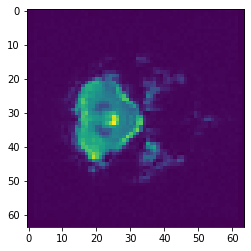

In [13]:
plt.imshow(data[:,:,0,0])

Text(0.5, 0, 'Signal Volume')

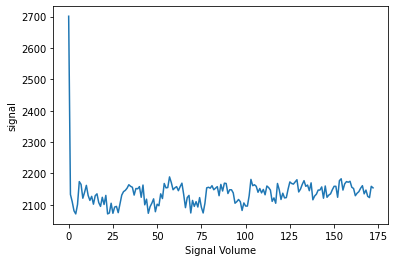

In [14]:
#Plot the voxel time course of these values 
plt.plot(voxel_time_course)
plt.ylabel('signal')
plt.xlabel('Signal Volume')

In [19]:
np.max(data) #Numpy operations work on the whole array by default 
#Gets the maximum number

6793.0

In [18]:
np.min(data)#Gets the minimum number on the array

0.0

In [21]:
#This is similar to 
np.max(np.ravel(data)) #Similar to getting the maximum value from a flattened array  by default,.

6793.0

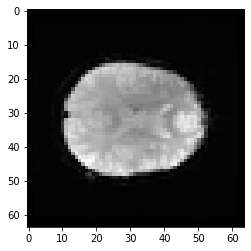

In [25]:
#Mean across the final time axis
mean_vol = np.mean(data, axis =3)
plt.imshow(mean_vol[:,:,14],cmap='gray')